# Portfolio Project

In this project I combine all the knowledge acquired through my learning and make use of them to perform basic data analysis.

Considering myself as a data analyst for a company that builds Android and iOS mobile apps, which are free to download and whose revenue generation is through the in-app ads. Which implies that the app's revenue is dependent on the number of active users that engage with the ads, and interact with the application.

Goal: Analyze data to help developers understand what type of apps are likely to attract more users.

## Loading the data
Performing necessary imports

In [1]:
from csv import reader

Defining a function to explore the dataset

In [2]:
def explore_data(dataset, start, end, rows_and_columns=False):
    dataset_slice = dataset[start:end]    
    for row in dataset_slice:
        print(row)
        print('\n') # adds a new (empty) line after each row

    if rows_and_columns:
        print('Number of rows:', len(dataset))
        print('Number of columns:', len(dataset[0]))

Opening the datasets

In [3]:
appleDataOpened = open("AppleStore.csv", encoding = "utf-8")
googleDataOpened = open("googleplaystore.csv", encoding = "utf-8")

Reading the data

In [4]:
appleData = list(reader(appleDataOpened))
googleData = list(reader(googleDataOpened))

In [5]:
appleHeader = appleData[0]
appleData = appleData[1:]
googleHeader = googleData[0]
googleData = googleData[1:]

Exploring the data
* Apple Store data

In [6]:
explore_data(dataset = appleData,start = 0, end = 5, rows_and_columns = True)

['284882215', 'Facebook', '389879808', 'USD', '0.0', '2974676', '212', '3.5', '3.5', '95.0', '4+', 'Social Networking', '37', '1', '29', '1']


['389801252', 'Instagram', '113954816', 'USD', '0.0', '2161558', '1289', '4.5', '4.0', '10.23', '12+', 'Photo & Video', '37', '0', '29', '1']


['529479190', 'Clash of Clans', '116476928', 'USD', '0.0', '2130805', '579', '4.5', '4.5', '9.24.12', '9+', 'Games', '38', '5', '18', '1']


['420009108', 'Temple Run', '65921024', 'USD', '0.0', '1724546', '3842', '4.5', '4.0', '1.6.2', '9+', 'Games', '40', '5', '1', '1']


['284035177', 'Pandora - Music & Radio', '130242560', 'USD', '0.0', '1126879', '3594', '4.0', '4.5', '8.4.1', '12+', 'Music', '37', '4', '1', '1']


Number of rows: 7197
Number of columns: 16


* Google play store data

In [7]:
explore_data(dataset = googleData,start = 0, end = 5, rows_and_columns = True)

['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']


['Coloring book moana', 'ART_AND_DESIGN', '3.9', '967', '14M', '500,000+', 'Free', '0', 'Everyone', 'Art & Design;Pretend Play', 'January 15, 2018', '2.0.0', '4.0.3 and up']


['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN', '4.7', '87510', '8.7M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'August 1, 2018', '1.2.4', '4.0.3 and up']


['Sketch - Draw & Paint', 'ART_AND_DESIGN', '4.5', '215644', '25M', '50,000,000+', 'Free', '0', 'Teen', 'Art & Design', 'June 8, 2018', 'Varies with device', '4.2 and up']


['Pixel Draw - Number Art Coloring Book', 'ART_AND_DESIGN', '4.3', '967', '2.8M', '100,000+', 'Free', '0', 'Everyone', 'Art & Design;Creativity', 'June 20, 2018', '1.1', '4.4 and up']


Number of rows: 10841
Number of columns: 13


## Data processing
* Detect inaccurate data, and correct or remove it.
* Detect duplicate data, and remove the duplicates.

The app developemnt is targetted towards english speaking audience, hence:
* Remove non-English apps like 爱奇艺PPS -《欢乐颂2》电视剧热播.
* Remove apps that aren't free.  

From the [discussion section](https://www.kaggle.com/lava18/google-play-store-apps/discussion) at kaggle we find that the row 10472 has some error. Let us examine it compared against a correct data

In [8]:
print(googleHeader)
print(googleData[13])
print(googleData[10472])

['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']
['Mandala Coloring Book', 'ART_AND_DESIGN', '4.6', '4326', '21M', '100,000+', 'Free', '0', 'Everyone', 'Art & Design', 'June 26, 2018', '1.0.4', '4.4 and up']
['Life Made WI-Fi Touchscreen Photo Frame', '1.9', '19', '3.0M', '1,000+', 'Free', '0', 'Everyone', '', 'February 11, 2018', '1.0.19', '4.0 and up']


The 'Genres' column seems to be missing data.  
Removing the row with error 

In [9]:
del googleData[10472]

### Removing duplicate entries

In [10]:
appCount = {}
for app in googleData:
    if(app[0] in appCount):
        appCount[app[0]] +=1
    else:
        appCount[app[0]] = 1

In [11]:
uniqueApps = []
duplicateApps = []
for app in appCount:
    if(appCount[app]>1):
        duplicateApps.append(app)
    else:
        uniqueApps.append(app)

Examing the apps that have duplicate records

In [12]:
print(duplicateApps[:15],'\nThere are',len(duplicateApps),'duplicate apps.. The first 15 are displayed above')

['Coloring book moana', 'Mcqueen Coloring pages', 'UNICORN - Color By Number & Pixel Art Coloring', 'Textgram - write on photos', 'Wattpad 📖 Free Books', 'Amazon Kindle', 'Dictionary - Merriam-Webster', 'NOOK: Read eBooks & Magazines', 'Oxford Dictionary of English : Free', 'Spanish English Translator', 'NOOK App for NOOK Devices', 'Ebook Reader', 'English Dictionary - Offline', 'Docs To Go™ Free Office Suite', 'Google My Business'] 
There are 798 duplicate apps.. The first 15 are displayed above


Examing an app and it's duplicate records

In [13]:
subData = []
print(googleHeader)
for app in googleData:
    if(app[0]=='Instagram'):
        print(app)

['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']
['Instagram', 'SOCIAL', '4.5', '66577313', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'July 31, 2018', 'Varies with device', 'Varies with device']
['Instagram', 'SOCIAL', '4.5', '66577446', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'July 31, 2018', 'Varies with device', 'Varies with device']
['Instagram', 'SOCIAL', '4.5', '66577313', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'July 31, 2018', 'Varies with device', 'Varies with device']
['Instagram', 'SOCIAL', '4.5', '66509917', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'July 31, 2018', 'Varies with device', 'Varies with device']


We observe varying 'Reviews' columns denoting different timings when the app details were extracted from the store.  
We use this field to remove duplicates, we keep only the record that has the highest number of reviews in the output data file.

Expected number of records after removal of duplicates in google playstore dataset

In [14]:
expectedRecordsGoogle = len(set(duplicateApps)) + len(uniqueApps) 
print(expectedRecordsGoogle)

9659


Creating a dictionary where each dictionary key is a unique app name and the corresponding dictionary value is the highest number of reviews of that app.

In [15]:
appDictGoogle = {}
for app in googleData:
    name = app[0]
    reviews = int(app[3])
    if(name in appDictGoogle and appDictGoogle[name] < reviews):
        appDictGoogle[name] = reviews
    elif(name not in appDictGoogle):
        appDictGoogle[name] = reviews

We've now obtained the best(latest) record of each duplicate set  
Removing the duplicates from the googleData

In [16]:
cleanedData = []
already_added = []
for app in googleData:
    name = app[0]
    reviews = int(app[3])
    if(appDictGoogle[name] == reviews and name not in already_added):
        cleanedData.append(app)
        already_added.append(name)
googleData = cleanedData       

In [17]:
print('Number of records in dataset before removing duplicates: ',len(googleData))
print('Expected number of records in dataset after removing duplicates: ',expectedRecordsGoogle)
print('Number of records in dataset after removing duplicates: ',len(cleanedData))

Number of records in dataset before removing duplicates:  9659
Expected number of records in dataset after removing duplicates:  9659
Number of records in dataset after removing duplicates:  9659


Checking if the App Store dataset has any duplicates 

In [18]:
appCount = {}
for app in appleData:
    if(app[0] in appCount):
        appCount[app[0]] +=1
    else:
        appCount[app[0]] = 1
uniqueApps = []
duplicateApps = []
for app in appCount:
    if(appCount[app]>1):
        duplicateApps.append(app)
    else:
        uniqueApps.append(app)
print('Number of duplicates found: ',len(duplicateApps))

Number of duplicates found:  0


### Removing non-english entries
The numbers corresponding to the characters we commonly use in an English text are all in the range 0 to 127, according to the ASCII (American Standard Code for Information Interchange) system.  
Based on this number range, we can build a function that detects whether a character belongs to the set of common English characters or not.  

Note: In my interpretation some apps use emojis in their name, to avoid filtering out these I check for more than 1 character in name whose ASCII value is not in prescribed range.

Function to find names of apps that are non-english and that need to be removed

In [19]:
def findNonEnglish(dataset):
    removeList = []
    for app in dataset:
        name = app[0]
        nameSplit = [x for x in name]
        count = 0
        for char in nameSplit:
            c_ord = ord(char)
            if(c_ord not in range(0,128)):
                count+=1
                if(count>3):
                    if(name not in removeList):
                        removeList.append(name)
    return(removeList)

Function to remove unnecessary apps from an input list

In [20]:
def required(dataset,removeList):
    requiredApps = []
    for app in dataset:
        name = app[0]
        if(name not in removeList):
            requiredApps.append(app)
    return(requiredApps)

Removing all unnecessary apps from google playstore data

In [21]:
removeList = findNonEnglish(googleData)
googleData = required(googleData,removeList)

In [22]:
print('Length of google playstore dataset after removing unnecessary apps: ',len(googleData))

Length of google playstore dataset after removing unnecessary apps:  9614


Performing the same action for appstore apps

In [23]:
removeList = findNonEnglish(appleData)
appleData = required(appleData,removeList)

In [24]:
print('Length of apple appstore dataset after removing unnecessary apps: ',len(appleData))

Length of apple appstore dataset after removing unnecessary apps:  7197


### Isolating the free apps

In [25]:
googleFinal = []
appleFinal = []

for app in googleData:
    price = app[7]
    if price == '0':
        googleFinal.append(app)
        
for app in appleData:
    price = app[4]
    if price == '0.0':
        appleFinal.append(app)

In [26]:
print('Free Google Playstore apps: ',len(googleFinal))
print('Free Apple appstore apps: ',len(appleFinal))


Free Google Playstore apps:  8864
Free Apple appstore apps:  4056


Function to generate frequency table

In [27]:
def freq_table(dataset, index):
    table = {}
    total = 0
    
    for row in dataset:
        total += 1
        value = row[index]
        if value in table:
            table[value] += 1
        else:
            table[value] = 1
    
    table_percentages = {}
    for key in table:
        percentage = (table[key] / total) * 100
        table_percentages[key] = percentage 
    
    return table_percentages

Function to display the contents in descending order of value

In [28]:
def display_table(dataset, index):
    table = freq_table(dataset, index)
    table_display = []
    for key in table:
        key_val_as_tuple = (table[key], key)
        table_display.append(key_val_as_tuple)
        
    table_sorted = sorted(table_display, reverse = True)
    for entry in table_sorted:
        print(entry[1], ':', entry[0])

Analyzing the apps by category to see which category is the most popular on both platforms

In [30]:
display_table(appleData, -5)

Games : 53.66124774211477
Entertainment : 7.433652910935113
Education : 6.294289287203002
Photo & Video : 4.849242740030569
Utilities : 3.4458802278727245
Health & Fitness : 2.501042100875365
Productivity : 2.473252744198972
Social Networking : 2.3204112824788106
Lifestyle : 2.0008336807002918
Music : 1.9174656106711132
Shopping : 1.6951507572599693
Sports : 1.5839933305543976
Book : 1.5562039738780047
Finance : 1.445046547172433
Travel : 1.1254689453939142
News : 1.0421008753647354
Weather : 1.0004168403501459
Reference : 0.8892594136445742
Food & Drink : 0.8753647353063776
Business : 0.7919966652771988
Navigation : 0.6391552035570377
Medical : 0.31957760177851885
Catalogs : 0.1389467833819647


In [31]:
display_table(googleData, 9)

Tools : 8.602038693571874
Entertainment : 5.793634283336801
Education : 5.231953401289786
Business : 4.358227584772207
Medical : 4.108591637195756
Personalization : 3.900561680882047
Productivity : 3.879758685250676
Lifestyle : 3.775743707093822
Finance : 3.588516746411483
Sports : 3.442895776991887
Communication : 3.2660703141252343
Action : 3.110047846889952
Health & Fitness : 2.995631370917412
Photography : 2.9124193883919283
News & Magazines : 2.600374453921365
Social : 2.485957977948825
Travel & Local : 2.26752652381943
Books & Reference : 2.26752652381943
Shopping : 2.090701060952777
Simulation : 1.9762845849802373
Arcade : 1.9138755980861244
Dating : 1.768254628666528
Casual : 1.7162471395881007
Video Players & Editors : 1.674641148325359
Maps & Navigation : 1.3417932182234242
Puzzle : 1.2377782400665696
Food & Drink : 1.1649677553567712
Role Playing : 1.0817557728312877
Strategy : 0.9777407946744331
Racing : 0.9465363012273768
Libraries & Demo : 0.8737258165175785
Auto & Vehicl

The most popular genre seems to be "Tools"

Analyzing data based on category

In [32]:
display_table(googleData, 1)

FAMILY : 19.325982941543582
GAME : 9.819013938007073
TOOLS : 8.61244019138756
BUSINESS : 4.358227584772207
MEDICAL : 4.108591637195756
PERSONALIZATION : 3.900561680882047
PRODUCTIVITY : 3.879758685250676
LIFESTYLE : 3.786145204909507
FINANCE : 3.588516746411483
SPORTS : 3.3804867900977738
COMMUNICATION : 3.2660703141252343
HEALTH_AND_FITNESS : 2.995631370917412
PHOTOGRAPHY : 2.9124193883919283
NEWS_AND_MAGAZINES : 2.600374453921365
SOCIAL : 2.485957977948825
TRAVEL_AND_LOCAL : 2.2779280216351157
BOOKS_AND_REFERENCE : 2.26752652381943
SHOPPING : 2.090701060952777
DATING : 1.768254628666528
VIDEO_PLAYERS : 1.6954441439567296
MAPS_AND_NAVIGATION : 1.3417932182234242
FOOD_AND_DRINK : 1.1649677553567712
EDUCATION : 1.1025587684626585
ENTERTAINMENT : 0.9049303099646349
LIBRARIES_AND_DEMO : 0.8737258165175785
AUTO_AND_VEHICLES : 0.8737258165175785
WEATHER : 0.8217183274391513
HOUSE_AND_HOME : 0.7593093405450385
EVENTS : 0.6656958602038693
PARENTING : 0.6240898689411275
ART_AND_DESIGN : 0.6240

## Pandas Analysis

Here's the scenario. You're working for one of Google's data science teams and someone from another team, specifically an account manager — "a person who works for a company and is responsible for the management of sales and relationships with particular customers" — approaches you with a request. She wants to take a prophylactic approach and improve the revenue of undervalued apps to motivate the developers to keep working on them.

Since her department's budget for marketing won't allow her to invest on ads (which would boost the number of sales), the only way to improve the revenue is by tweaking the price. She requests that you determine which paid apps are undervalued (undervalued here means that their price could be increased without lowering demand).

In [49]:
import numpy as np
import pandas as pd

In [42]:
playstore = pd.read_csv("googleplaystore.csv")
print(playstore.shape)

(10841, 13)


In [40]:
playstore.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### Fixing problematic fields
we dropped the problematic row because it is a free app and our project is focused on paid apps. Let's continue exploring our dataset

In [43]:
playstore.drop(labels=10472, inplace=True)

### Fixing datatypes

Several columns which should have a numeric format but whose type is object. Specifically, Reviews, Size, and Price.

1. Reviews: No problems with this column, the only reason why pandas didn't used the proper type for this column was the presence of the problematic row we got rid of in the last screen.

2. Size: You may have noticed in the previous screen that the Size values contains letters like M and k, signifying memory size units. To clean this column, we'll use the function defined in the display code. Don't worry about the details of this function at this point. For now, just know that it takes strings — like the values of the price column — as input, and it returns a float number representing the size in megabytes.

3. Price: Some of the values include a $, it's enough to get rid of it to get the value ready for conversion.

Function to correct data within the memory column

In [47]:
def clean_size(size):
    size = size.replace("M","")
    if size.endswith("k"):
        size = float(size[:-1])/1000
    elif size == "Varies with device":
        size = np.NaN
    else:
        size = float(size)
    return size

In [54]:
playstore["Price"] = playstore["Price"].str.replace("$", "").astype("float")
paid = playstore[playstore["Price"] != 0].copy()
paid.drop("Type", axis = "columns",inplace = True)
paid["Reviews"] = paid["Reviews"].astype(int)
paid["Size"] = paid['Size'].apply(clean_size).astype(float)
paid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 234 to 10798
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             800 non-null    object 
 1   Category        800 non-null    object 
 2   Rating          647 non-null    float64
 3   Reviews         800 non-null    int32  
 4   Size            724 non-null    float64
 5   Installs        800 non-null    object 
 6   Price           800 non-null    float64
 7   Content Rating  800 non-null    object 
 8   Genres          800 non-null    object 
 9   Last Updated    800 non-null    object 
 10  Current Ver     798 non-null    object 
 11  Android Ver     799 non-null    object 
dtypes: float64(3), int32(1), object(8)
memory usage: 78.1+ KB


### Removing duplicates

In [55]:
paid = paid.sort_values("Reviews", ascending = False)
paid.drop_duplicates(subset = "App", keep = "first",inplace = True)
paid.duplicated("App").sum()
paid.reset_index(drop = True, inplace = True)

### Exploratory analysis around undervalued apps

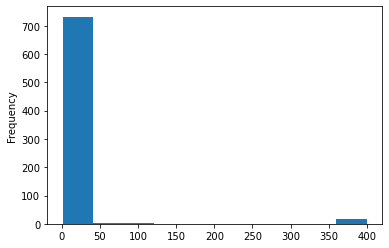

In [56]:
paid["Price"].plot(kind = "hist")

In [58]:
paid.sort_values(by = "Price", ascending = False)

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
278,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.300,"10,000+",400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
207,I am Rich Plus,FAMILY,4.0,856,8.700,"10,000+",399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
732,I'm Rich/Eu sou Rico/أنا غني/我很有錢,LIFESTYLE,NaN,0,40.000,0+,399.99,Everyone,Lifestyle,"December 1, 2017",MONEY,4.1 and up
155,I Am Rich Premium,FINANCE,4.1,1867,4.700,"50,000+",399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
356,I am rich (Most expensive app),FINANCE,4.1,129,2.700,"1,000+",399.99,Teen,Finance,"December 6, 2017",2,4.0.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...
486,Nightenfell: Shared AR,GAME,4.5,20,65.000,"1,000+",0.99,Everyone 10+,Action,"March 27, 2018",1.0.0,7.0 and up
483,Poker Equity Calculator Pro for No Limit Hold'em,GAME,4.0,21,14.000,"5,000+",0.99,Everyone,Card,"September 10, 2017",1.3,5.0 and up
481,GO Contacts EX Black & Grey,PERSONALIZATION,3.7,21,0.376,500+,0.99,Everyone,Personalization,"September 24, 2013",1.0,1.6 and up
480,pretty Easy privacy p≡p,COMMUNICATION,3.7,21,20.000,500+,0.99,Everyone,Communication,"July 30, 2018",1.0.100rc1.withoutKeysync,5.0 and up


Most of the apps at the top of the list are very niche and get in the way of our analysis, therefore we filter to just the apps whose price are below $50

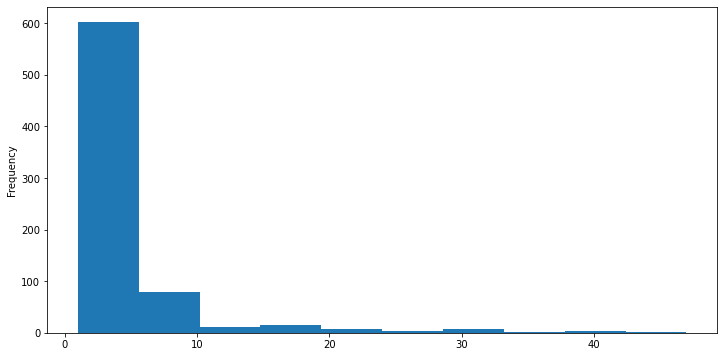

In [64]:
affordable_apps = paid[paid["Price"]<50].copy()
affordable_apps['Price'].plot(kind = "hist", figsize=(12,6))

The graph is still skewed to the right, we seggregate the data according to price at $5 price mark

In [60]:
cheap = affordable_apps['Price']<5
reasonable = affordable_apps['Price']>=5

#### Viewing the cheaper apps

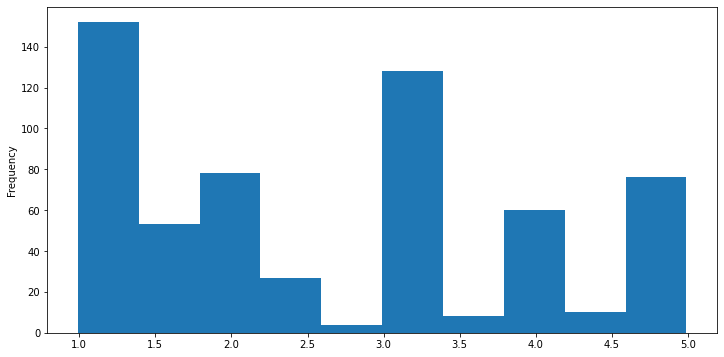

In [66]:
affordable_apps['Price'][cheap].plot(kind = "hist", figsize=(12,6))

#### Viewing reasonably priced apps

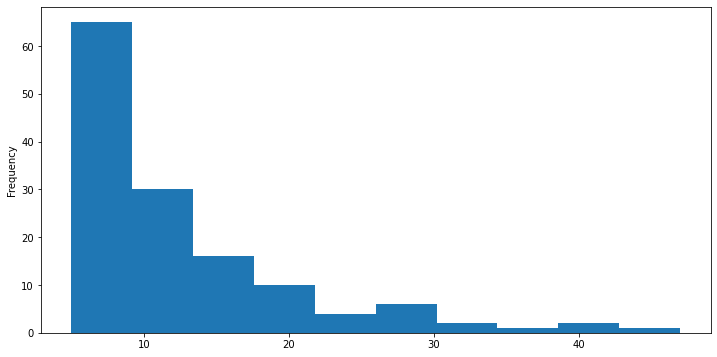

In [67]:
affordable_apps['Price'][reasonable].plot(kind = "hist", figsize=(12,6))

In [70]:
affordable_apps["affordability"] = affordable_apps["Price"].apply(lambda x: "cheap" if x<5 else "resonable")

### Investigating correlations in variables

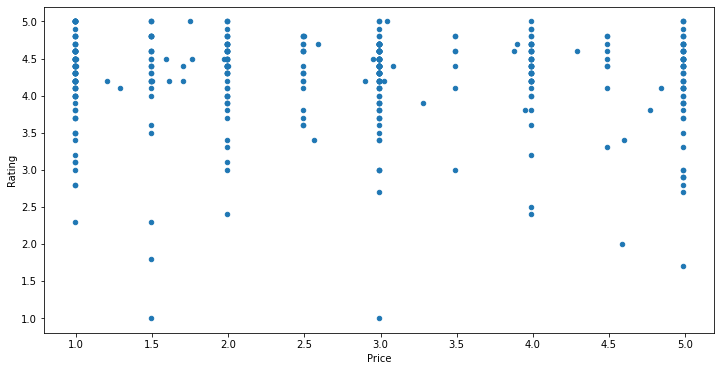

In [86]:
affordable_apps[cheap].plot(x = "Price", y = "Rating", kind = "scatter", figsize=(12,6))

Examining the Pearson's correlation coefficient for the pair of variables 'Reviews' and 'Price'

In [71]:
affordable_apps[cheap].corr().loc["Rating", "Price"]

-0.05593771505463038

The value of which is close to 0 hence we can deduce that the price has very little do with the rating of an app for apps that are priced below $5.   
This is good news for our price tweaking strategy, because it suggests that we can change prices without it being reflected in the apps' rating.

In [83]:
cheap_mean = affordable_apps['Price'][cheap].mean()
cheap_mean

2.580318791946309

In [85]:
affordable_apps["price_criterion"] = affordable_apps["Price"].apply(lambda x: 1 if x<cheap_mean else 0)

And similarly for the reasonably priced apps

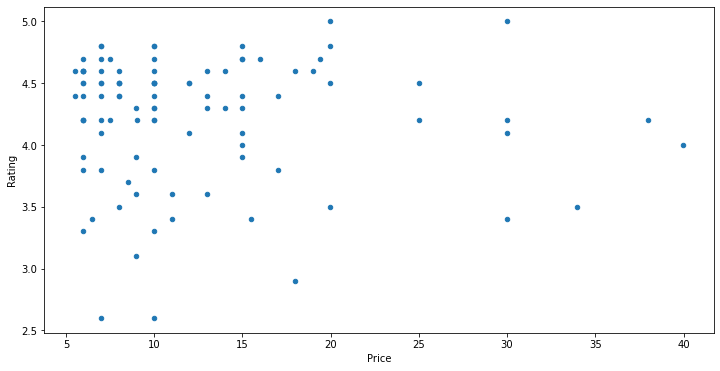

In [87]:
affordable_apps[reasonable].plot(x = "Price", y = "Rating", kind = "scatter", figsize=(12,6))

In [88]:
affordable_apps[reasonable].corr().loc["Rating", "Price"]

-0.048609647085130735

In [89]:
reasonable_mean = affordable_apps['Price'][reasonable].mean()
reasonable_mean

12.448686131386859

In [90]:
affordable_apps["price_criterion"] = affordable_apps["Price"].apply(lambda x: 1 if x<reasonable_mean else 0)

This we've labelled the apps for which we can strategically increase the price without affecting the reviews

### Examing the genre and category fields

In the interest of getting some quick results for our prototype, we'll now focus on the categories and genres, leaving other features for another time.  

In [92]:
affordable_apps.head(5)

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,affordability,price_criterion
0,Minecraft,FAMILY,4.5,2376564,NaN,"10,000,000+",6.99,Everyone 10+,Arcade;Action & Adventure,"July 24, 2018",1.5.2.1,Varies with device,resonable,1
1,Hitman Sniper,GAME,4.6,408292,29.0,"10,000,000+",0.99,Mature 17+,Action,"July 12, 2018",1.7.110758,4.1 and up,cheap,1
2,Grand Theft Auto: San Andreas,GAME,4.4,348962,26.0,"1,000,000+",6.99,Mature 17+,Action,"March 21, 2015",1.08,3.0 and up,resonable,1
3,Bloons TD 5,FAMILY,4.6,190086,94.0,"1,000,000+",2.99,Everyone,Strategy,"July 13, 2018",3.16,2.3.3 and up,cheap,1
4,Where's My Water?,FAMILY,4.7,188740,69.0,"1,000,000+",1.99,Everyone,Puzzle;Brain Games,"July 5, 2018",1.16.0,4.2 and up,cheap,1


Looking at the first few rows of affordable_apps, we see that multiple genres are separated by ';'

Since affordable_apps has only around 700 rows and the genres column can take many multiple values separated by ';', segmenting by this column could spread our data too thin to extract any significant insights. 

Instead of simply ignoring it, we'll extract some information from there and see where that leaves us.

In [95]:
affordable_apps["Genres"].unique()

array(['Arcade;Action & Adventure', 'Action', 'Strategy',
       'Puzzle;Brain Games', 'Card;Action & Adventure', 'Sports',
       'Personalization', 'Arcade', 'Puzzle', 'Productivity', 'Weather',
       'Tools', 'Sports;Action & Adventure', 'Communication',
       'Role Playing', 'Photography', 'Card', 'Simulation;Education',
       'Adventure', 'Education;Pretend Play', 'Lifestyle',
       'Strategy;Action & Adventure', 'Board', 'Finance',
       'Health & Fitness', 'Role Playing;Action & Adventure', 'Music',
       'Travel & Local', 'Business', 'Simulation',
       'Adventure;Action & Adventure', 'Parenting',
       'Adventure;Brain Games', 'Entertainment', 'Maps & Navigation',
       'Video Players & Editors', 'Racing', 'Medical', 'Auto & Vehicles',
       'Educational;Pretend Play', 'Casual;Pretend Play',
       'Education;Creativity', 'Education', 'Board;Brain Games',
       'Food & Drink', 'Action;Action & Adventure',
       'Simulation;Pretend Play', 'Dating', 'Books & Referenc

 Looking at the possible values for this column, we see that ; isn't part of the name of genre row with just one single value
 
 Creating a column that counts the number of values in the 'Genres' column, for which we just count the number of occurances of ';'

In [96]:
affordable_apps["genre_count"] = affordable_apps["Genres"].str.count(";")+1

We now take a look at the variation in the mean price for the two categories of apps - 'reasonable' and cheap for the different counts of Genres.

In [97]:
genres_mean = affordable_apps.groupby(["affordability", "genre_count"]).mean()[["Price"]]
genres_mean

Price
affordability genre_count           
cheap         1             2.507448
              2             3.155672
resonable     1            12.574627
              2             6.823333

Curiously, apps that belong to two genres are more expensive among the cheap apps and cheaper among the reasonable apps.

For each segment, let's label the apps that cost less than their corresponding segments' mean with 1, and the others with 0

Function to perform the labelling:

In [98]:
def label_genres(row):
    aff = row["affordability"]
    gc = row["genre_count"]
    price = row["Price"]

    if price < genres_mean.loc[(aff, gc)][0]:
        return 1
    else:
        return 0

In [99]:
affordable_apps["genre_criterion"] = affordable_apps.apply(label_genres, axis="columns")

And now, similarly for the category variable

Creating a dataframe that stores the mean price for each segment

In [107]:
categories_mean = affordable_apps.groupby(["affordability", "Category"]).mean()[["Price"]]
categories_mean

Price
affordability Category                      
cheap         ART_AND_DESIGN        1.990000
              AUTO_AND_VEHICLES     1.740000
              BOOKS_AND_REFERENCE   2.529286
              BUSINESS              3.632857
              COMMUNICATION         2.428846
              DATING                3.115000
              EDUCATION             3.990000
              ENTERTAINMENT         3.990000
              FAMILY                2.762710
              FINANCE               3.490000
              FOOD_AND_DRINK        4.240000
              GAME                  2.547222
              HEALTH_AND_FITNESS    3.035455
              LIBRARIES_AND_DEMO    0.990000
              LIFESTYLE             2.895000
              MAPS_AND_NAVIGATION   1.656667
              MEDICAL               2.764286
              NEWS_AND_MAGAZINES    1.990000
              PARENTING             4.790000
              PERSONALIZATION       1.689873
              PHOTOGRAPHY           3.023571
              PRODUCTIVITY          2.635909
              SHOPPING              2.740000
              SOCIAL                0.990000
              SPORTS                2.773636
              TOOLS                 2.596056
              TRAVEL_AND_LOCAL      2.942222
              VIDEO_PLAYERS         1.490000
              WEATHER               3.240000
resonable     AUTO_AND_VEHICLES     9.990000
              BOOKS_AND_REFERENCE   6.025714
              BUSINESS             14.967500
              COMMUNICATION        19.990000
              DATING                7.490000
              EDUCATION             5.990000
              FAMILY               15.426800
              FINANCE              21.240000
              GAME                 10.091000
              HEALTH_AND_FITNESS    7.740000
              LIFESTYLE            17.323333
              MAPS_AND_NAVIGATION  10.990000
              MEDICAL              13.805789
              PERSONALIZATION       8.490000
              PHOTOGRAPHY          15.190000
              PRODUCTIVITY          7.590000
              SOCIAL               13.990000
              SPORTS               19.490000
              TOOLS                11.847143
              TRAVEL_AND_LOCAL      7.823333
              VIDEO_PLAYERS         5.990000
              WEATHER               6.490000

For each app whose price is less than the category mean we label the newly created category_criterion with 1 and 0 otherwise.

Function to perform the same

In [105]:
def label_categories(row):
    aff = row["affordability"]
    cat = row["Category"]
    price = row["Price"]
    if price < categories_mean.loc[(aff, cat)][0]:
        return 1
    else:
        return 0

In [106]:
affordable_apps["category_criterion"] = affordable_apps.apply(label_categories, axis="columns")

### Majority voting criteron for selection of apps whose price is to be increased

Since we have 3 voting parameters namely
* price_criterion
* genre_criterion
* category_criterion  

If for an app more an 1 category is set to 1, that app qualifies to be filtered for price variation

In [108]:
criteria = ["price_criterion", "genre_criterion", "category_criterion"]
affordable_apps["Result"] = affordable_apps[criteria].mode(axis='columns')

number of apps eligible for price increase

In [111]:
affordable_apps["Result"].sum()

447

Which is approximately 50% of the total number of affordable apps

### Estimation of impact of price increase

We estimate the new price for these apps as:
* For apps in cheap category the new price will be max(cheap_mean, Price)
* For apps in reasonable category the new price will be max(reasonable_mean, Price)

Creating function to compute price

In [112]:
def new_price(row):
    if row["affordability"] == "cheap":
        return round(max(row["Price"], cheap_mean), 2)
    else:
        return round(max(row["Price"], reasonable_mean), 2)

In [113]:
affordable_apps["New Price"] = affordable_apps.apply(new_price, axis="columns")

Computing the impact which is - Total number of installs \* (New Price - Old Price)

In [114]:
affordable_apps["Installs"] = affordable_apps["Installs"].str.replace("[+,]", "").astype(int)

In [115]:
affordable_apps["Impact"] = (affordable_apps["New Price"]-affordable_apps["Price"])*affordable_apps["Installs"]

In [116]:
total_impact = affordable_apps["Impact"].sum()
total_impact

115441618.98

## To-do
Include unused data in the analysis, specifically:
* The number of reviews;
* The size of the app;
* The content rating;
* The last time the app was updated;
* The app's Android versions;